In [1]:
#Linear Regression
import pandas as pd
import pickle
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import RFECV

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
                                                  

In [2]:
data_for_model = pickle.load(open(r"C:\Users\19144\OneDrive\Desktop\Data Science Infinity\Python Fundamentals\Pickle files\abc_regression_modeling.p", "rb")) #rb for reading a file in


In [3]:
data_for_model

,customer_id,distance_from_store,gender,credit_score,customer_loyalty_score,total_sales,total_items,transaction_count,product_area_count,average_basket_value
0,74,3.38,F,0.59,0.263,2563.71,297,44,5,58.266136
1,524,4.76,F,0.52,0.298,2996.02,357,49,5,61.143265
2,607,4.45,F,0.49,0.337,2853.82,350,49,5,58.241224
3,343,0.91,M,0.54,0.873,2388.31,272,54,5,44.227963
4,322,3.02,F,0.63,0.350,2401.64,278,50,5,48.032800
...,...,...,...,...,...,...,...,...,...,...
862,4,2.14,M,0.64,0.564,3499.39,278,47,5,74.455106
865,372,4.38,F,0.50,0.321,3423.01,338,49,5,69.857347
866,104,2.36,F,0.63,0.587,3648.08,280,49,5,74.450612
868,373,0.21,M,0.47,0.972,3303.80,264,51,5,64.780392


In [4]:
data_for_model.drop("customer_id", axis=1, inplace=True) #True so that it is applied


In [5]:
data_for_model

,distance_from_store,gender,credit_score,customer_loyalty_score,total_sales,total_items,transaction_count,product_area_count,average_basket_value
0,3.38,F,0.59,0.263,2563.71,297,44,5,58.266136
1,4.76,F,0.52,0.298,2996.02,357,49,5,61.143265
2,4.45,F,0.49,0.337,2853.82,350,49,5,58.241224
3,0.91,M,0.54,0.873,2388.31,272,54,5,44.227963
4,3.02,F,0.63,0.350,2401.64,278,50,5,48.032800
...,...,...,...,...,...,...,...,...,...
862,2.14,M,0.64,0.564,3499.39,278,47,5,74.455106
865,4.38,F,0.50,0.321,3423.01,338,49,5,69.857347
866,2.36,F,0.63,0.587,3648.08,280,49,5,74.450612
868,0.21,M,0.47,0.972,3303.80,264,51,5,64.780392


In [6]:
#Shuffle data
#Best practice step
#This aids us in being sensitive to how data is organized - it may or may not have an impact on the model itself
data_for_model = shuffle(data_for_model, random_state=42)

In [7]:
#Dealing with missing values
data_for_model.isna().sum()

distance_from_store       2
gender                    3
credit_score              2
customer_loyalty_score    0
total_sales               0
total_items               0
transaction_count         0
product_area_count        0
average_basket_value      0
dtype: int64

In [8]:
data_for_model.dropna(how = "any", inplace=True) #If any missing values, then whole row is dropped, True so that it is applied

In [9]:
#Deal with outliers
outlier_investigation = data_for_model.describe()

In [10]:
outlier_investigation

,distance_from_store,credit_score,customer_loyalty_score,total_sales,total_items,transaction_count,product_area_count,average_basket_value
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,2.021041,0.596117,0.509589,1846.502538,278.304569,44.926396,4.312183,36.781487
std,2.566045,0.101352,0.294504,1767.829482,214.236424,21.248012,0.725054,19.337336
min,0.000000,0.260000,0.002000,45.950000,10.000000,4.000000,2.000000,9.342000
25%,0.710000,0.530000,0.263000,942.067500,201.000000,41.000000,4.000000,22.406953
50%,1.645000,0.590000,0.510500,1471.490000,258.500000,50.000000,4.000000,30.365417
75%,2.910000,0.660000,0.771500,2104.727500,318.500000,53.000000,5.000000,47.208474
max,44.370000,0.880000,1.000000,9878.760000,1187.000000,109.000000,5.000000,102.335417


In [11]:
#Approach 1 - Boxplot approach

outlier_columns = ["distance_from_store", "total_sales", "total_items"]

for column in outlier_columns:
    lower_quartile = data_for_model[column].quantile(0.25) #25 percentile/lower quartile
    upper_quartile = data_for_model[column].quantile(0.75) #25 percentile/lower quartile
    iqr = upper_quartile - lower_quartile
    iqr_extended = iqr*2 #Widened from 1.5 because I don't want to cut out too many outliers
    min_border = lower_quartile - iqr_extended
    max_border = upper_quartile + iqr_extended
    
    outliers = data_for_model[(data_for_model[column] < min_border) | (data_for_model[column] > max_border)].index

    print(f"{len(outliers)} outliers detected in column {column}")
    
    data_for_model.drop(outliers, inplace =True)

2 outliers detected in column distance_from_store
23 outliers detected in column total_sales
0 outliers detected in column total_items


In [12]:
data_for_model

,distance_from_store,gender,credit_score,customer_loyalty_score,total_sales,total_items,transaction_count,product_area_count,average_basket_value
455,0.28,M,0.81,0.889,990.65,243,53,4,18.691509
621,2.58,F,0.58,0.162,333.26,70,13,4,25.635385
64,0.80,M,0.80,0.956,1753.96,371,52,5,33.730000
456,0.16,M,0.56,0.926,929.57,225,51,4,18.226863
196,3.27,F,0.67,0.297,1904.55,376,36,3,52.904167
...,...,...,...,...,...,...,...,...,...
146,1.34,M,0.57,0.690,1682.14,364,47,4,35.790213
226,1.85,M,0.63,0.242,1787.61,196,53,5,33.728491
588,1.53,F,0.54,0.324,1173.84,193,55,5,21.342545
771,2.28,F,0.45,0.079,70.67,23,4,3,17.667500


In [13]:
#We had 394 rows, now we are down to 369 rows

In [14]:
#Split input variables and output variables
X = data_for_model.drop(["customer_loyalty_score"], axis=1)
y = data_for_model["customer_loyalty_score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [15]:
#Deal with categorical variables
categorical_vars = ["gender"]

one_hot_encoder = OneHotEncoder(sparse=False, drop="first") #Drop first encoded column to avoid dummy trap

X_train_encoded = one_hot_encoder.fit_transform(X_train[categorical_vars]) #Want to use fit transform on training data, but transform only on test data 
#Want encoding rules learned on training, and then applied on testing - rules will remain the same
X_test_encoded = one_hot_encoder.transform(X_test[categorical_vars]) 

encoder_feature_names = one_hot_encoder.get_feature_names_out(input_features=categorical_vars)

# Run for x_train
X_train_encoded = pd.DataFrame(X_train_encoded, columns=encoder_feature_names)
X_train = pd.concat([X_train.reset_index(drop=True), X_train_encoded.reset_index(drop=True)], axis=1)
X_train.drop(categorical_vars, axis=1, inplace=True)

# Run for x_test
X_test_encoded = pd.DataFrame(X_test_encoded, columns=encoder_feature_names)
X_test = pd.concat([X_test.reset_index(drop=True), X_test_encoded.reset_index(drop=True)], axis=1)
X_test.drop(categorical_vars, axis=1, inplace=True)


C:\Users\19144\anaconda4\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [16]:
#Feature Selection
regressor = LinearRegression()
feature_selector = RFECV(regressor)
#By default, cross validation uses 5 chunks of data to analyze
#Cross validation  - split into 5, training on model on 4, and validating model on remaining chunk
#Powerful way to validate model

fit = feature_selector.fit(X_train,y_train) #These are objects that have had our data prep applied to

optimal_feature_count = feature_selector.n_features_
print(f"Optimal number of features: {optimal_feature_count}")

X_train = X_train.loc[:, feature_selector.get_support()]
X_test = X_test.loc[:, feature_selector.get_support()]
#8 optimal variables 
#Through cross validation - input3 and input4 were not useful here



Optimal number of features: 8


Text(0.5, 1.0, 'Feature Selection using RFE \n Optimal number of features is 8 (at score of 0.8625)')

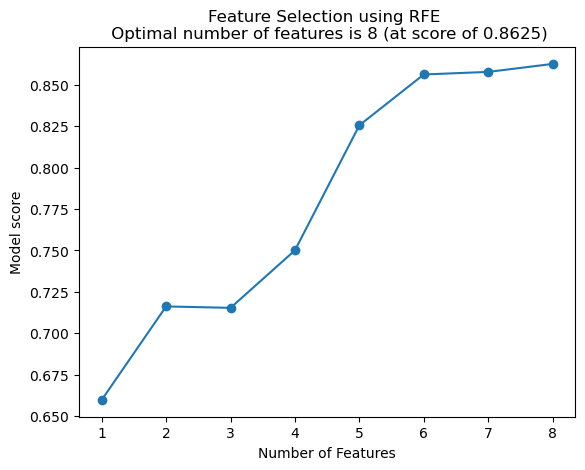

In [17]:
plt.plot(range(1, len(fit.cv_results_['mean_test_score']) + 1), fit.cv_results_['mean_test_score'], marker="o")
plt.ylabel("Model score")
plt.xlabel("Number of Features")
plt.title(f"Feature Selection using RFE \n Optimal number of features is {optimal_feature_count} (at score of {round(max(fit.cv_results_['mean_test_score']), 4)})")



In [18]:
#Model Training

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [19]:
#Predict on the Test Set
y_pred = regressor.predict(X_test)

In [20]:
#Calculate R-Square
r_squared = r2_score(y_test, y_pred)
print(r_squared)

0.7805702910327403


In [21]:
#Cross Validation
#Regression
#We might need to shuffle the data and a random state together
cv = KFold(n_splits = 4, shuffle = True, random_state=42)
cv_scores = cross_val_score(regressor, X_train, y_train, cv=cv, scoring = "r2")
#cv=cv
# Print individual scores for each fold
for i, score in enumerate(cv_scores, start=1):
    print(f"CV Fold {i} Score: {score:.4f}")

print(f"CV Fold Mean Score : {cv_scores.mean()}")


CV Fold 1 Score: 0.8428
CV Fold 2 Score: 0.8600
CV Fold 3 Score: 0.8913
CV Fold 4 Score: 0.8188
CV Fold Mean Score : 0.8532327536589748


In [22]:
#Calculate Adjusted R-square
num_data_points, num_input_vars = X_test.shape

In [23]:
num_data_points #74 rows in test set

74

In [24]:
num_input_vars #8 columns in test set 

8

In [31]:
adjusted_r_squared = 1 - (1- r_squared) * (num_data_points - 1) / (num_data_points - num_input_vars -1)
print(adjusted_r_squared)

0.7744323970756142


In [32]:
#Extract Model Coefficients

coefficients = pd.DataFrame(regressor.coef_)

In [33]:
coefficients #Coefficient scores 

,0
0,-0.201232
1,-0.027697
2,0.000142
3,0.001002
4,-0.004842
5,0.061659
6,-0.003971
7,-0.013393


In [34]:
input_variable_names = pd.DataFrame(X_train.columns)

In [35]:
summary_stats = pd.concat([input_variable_names,coefficients], axis=1)

In [36]:
summary_stats.columns = ["input_variable", "coefficient"]

In [37]:
summary_stats

,input_variable,coefficient
0,distance_from_store,-0.201232
1,credit_score,-0.027697
2,total_sales,0.000142
3,total_items,0.001002
4,transaction_count,-0.004842
5,product_area_count,0.061659
6,average_basket_value,-0.003971
7,gender_M,-0.013393


In [38]:
#How to interpret 
#Our output variable is consumer loyalty scores
#If we look at distance from store:
#Loyalty score would go down 0.20, or 20% (as loyalty is decimal between 0-1) for every extra mile a consumer lives far away from store - consumers may do shopping to closer stores

In [39]:
#Extract Model Intercept
regressor.intercept_

0.5160974174646195

In [ ]:
#We have everything we need for line of best fit formula